<a href="https://colab.research.google.com/github/Argentan/DMA_LAB2/blob/master/tutoriales/05_valicacion_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Validación de Modelos

Los algoritmos de aprendizaje automático se entrenan mediante la optimizaicón de una función sobre los datos de entrenamiento. Por ende, no se puede validar la hipótesis aprendida sobre los mismos datos que se usaron para formularla. Si lo hiciéramos, lejos de obtener una métrica adecuada de lo bien que generalizará nuestro modelo, solo tendríamos una evaluación de cuánto se ajusta a los datos de entrenamiento. Cuando ese ajuste es muy fuerte y la generalización es muy mala, se dice que incurrimos en un ajuste excesivo (overfitting).

Exísten métodos que nos permiten estimar cuñanto generalizará un determinado modelo. En primer término, la simple división entre entrenamiento y validación puede dar la primera aproximación. Generalizando esta idea, se llega a la técnica de validación cruzada (cross-validation) que es la división en k subconjuntos disjuntos de entrenamiento y validación. Llevado al extremo, tenemos los métodos de dejar-p-afuera (leave p out), que cuando p=1, implica el entrenamiento de n modelos para precedir en cada uno de los casos, habiendo entrenado en todos los demás.


## Separación simple en entrenamiento y validación

En el tutorial anterior, vimos un ejemplo de tomar un porcentaje p% de casos al azar para validación, entrenando con el restante (1-p)%. Ese fue un caso de simple separación aleatoria entre entrenamiento y validación. 

Scikit Learn es una librería que no solo tiene una amplia variedad de algoritmos de aprendizaje automático, sino que provee una gran cantidad de funciones auxiliares para simplificar el tratamiento de los datos, entre ellas, las de validación.


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
sns.set()

In [2]:
#setup para el notebook
%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams['figure.figsize'] = (16, 12)

In [3]:
try:
    data = pd.read_csv("../data/titanic_proc.csv", index_col="PassengerId")
except:
    data = pd.read_csv("https://raw.githubusercontent.com/Argentan/DMA_LAB2/master/data/titanic_proc.csv", index_col="PassengerId")
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.00,1,0,0,7.25,0,1,0,0,1,0
2,1,1,1,38.00,1,0,1,71.28,1,1,1,0,0,0
3,1,3,1,26.00,0,0,2,7.92,0,0,0,0,1,0
4,1,1,1,35.00,1,0,3,53.10,2,1,0,0,1,0
5,0,3,0,35.00,0,0,4,8.05,0,0,0,0,1,0


In [4]:
# Scale numeric data
from sklearn.preprocessing import StandardScaler
 
# Select numerical columns
num_cols = data.select_dtypes(include=['float64']).columns
 
# Apply StandardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
1,0,3,0,-0.59,1,0,0,-0.50,0,1,0,0,1,0
2,1,1,1,0.64,1,0,1,0.79,1,1,1,0,0,0
3,1,3,1,-0.28,0,0,2,-0.49,0,0,0,0,1,0
4,1,1,1,0.41,1,0,3,0.42,2,1,0,0,1,0
5,0,3,0,0.41,0,0,4,-0.49,0,0,0,0,1,0


Repasamos como se componen los argumentos de las funciones

In [ ]:
def test(a, b, c="default"):
    print(a, b, c)

test(**{"a": 1, "b": 2, "c": "no default"})

1 2 no default


Vemos la ayuda de la función `train_test_split`

In [ ]:
model_selection.train_test_split?

In [5]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(data.drop("Survived", axis=1), 
                                                                    data.Survived, test_size=0.1, random_state=0)
print(f"X_train: {X_train.shape}")
print(f"X_valid: {X_valid.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_valid: {y_valid.shape}")

X_train: (801, 13)
X_valid: (90, 13)
y_train: (801,)
y_valid: (90,)


In [6]:
print(X_train.head())
y_train.head()

             Pclass  Sex   Age  SibSp  Parch  Ticket  Fare  Cabin  NumFam  C  \
PassengerId                                                                    
816               1    0  0.00      0      0     634 -0.65    138       0  0   
878               3    0 -0.82      0      0     671 -0.49      0       0  0   
194               2    0 -2.05      1      1     137 -0.12     27       2  0   
524               1    1  1.10      0      1     290  0.52     63       1  1   
635               3    1 -1.59      3      2      62 -0.09      0       5  0   

             Q  S  Age_nul  
PassengerId                 
816          0  1        1  
878          0  1        0  
194          0  1        0  
524          0  0        0  
635          0  1        0  


PassengerId
816    0
878    0
194    1
524    1
635    0
Name: Survived, dtype: int64

In [7]:
print(X_valid.head())
y_valid.head()

             Pclass  Sex   Age  SibSp  Parch  Ticket  Fare  Cabin  NumFam  C  \
PassengerId                                                                    
496               3    0  0.00      0      0     111 -0.36      0       0  1   
649               3    0  0.00      0      0     522 -0.50      0       0  0   
279               3    0 -1.75      4      1      16 -0.06      0       5  0   
32                1    1  0.00      1      0      30  2.30      9       1  1   
256               3    1 -0.05      0      2     228 -0.34      0       2  1   

             Q  S  Age_nul  
PassengerId                 
496          0  0        1  
649          0  1        1  
279          1  0        0  
32           0  0        1  
256          0  0        0  


PassengerId
496    0
649    0
279    0
32     1
256    1
Name: Survived, dtype: int64

## Ajuste de Hiperparámetros

Vamos a comenzar ajustando los valores posibles de un parámetro `max_depth` en un modelo de `RandomForestClassifier`

In [8]:
depths = list(range(2, 40, 2)) + [None]
depths

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, None]

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score

Armamos un DF para guardar los resultados

In [10]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
res

,train,valid
2,NaN,NaN
4,NaN,NaN
6,NaN,NaN
8,NaN,NaN
10,NaN,NaN
...,...,...
32,NaN,NaN
34,NaN,NaN
36,NaN,NaN
38,NaN,NaN


Luego entrenamos el modelo con los distintos valores del parámetro y vemos como mejora la Entropía cruzada (log loss)

In [12]:
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = log_loss(y_train, learner.predict_proba(X_train))
    res.loc[str(depth), "valid"] = log_loss(y_valid, learner.predict_proba(X_valid))

In [13]:
res

,train,valid
2,0.51,0.49
4,0.42,0.41
6,0.34,0.37
8,0.27,0.37
10,0.20,0.39
...,...,...
32,0.11,0.40
34,0.11,0.41
36,0.11,0.41
38,0.11,0.41


Graficamos el resultado

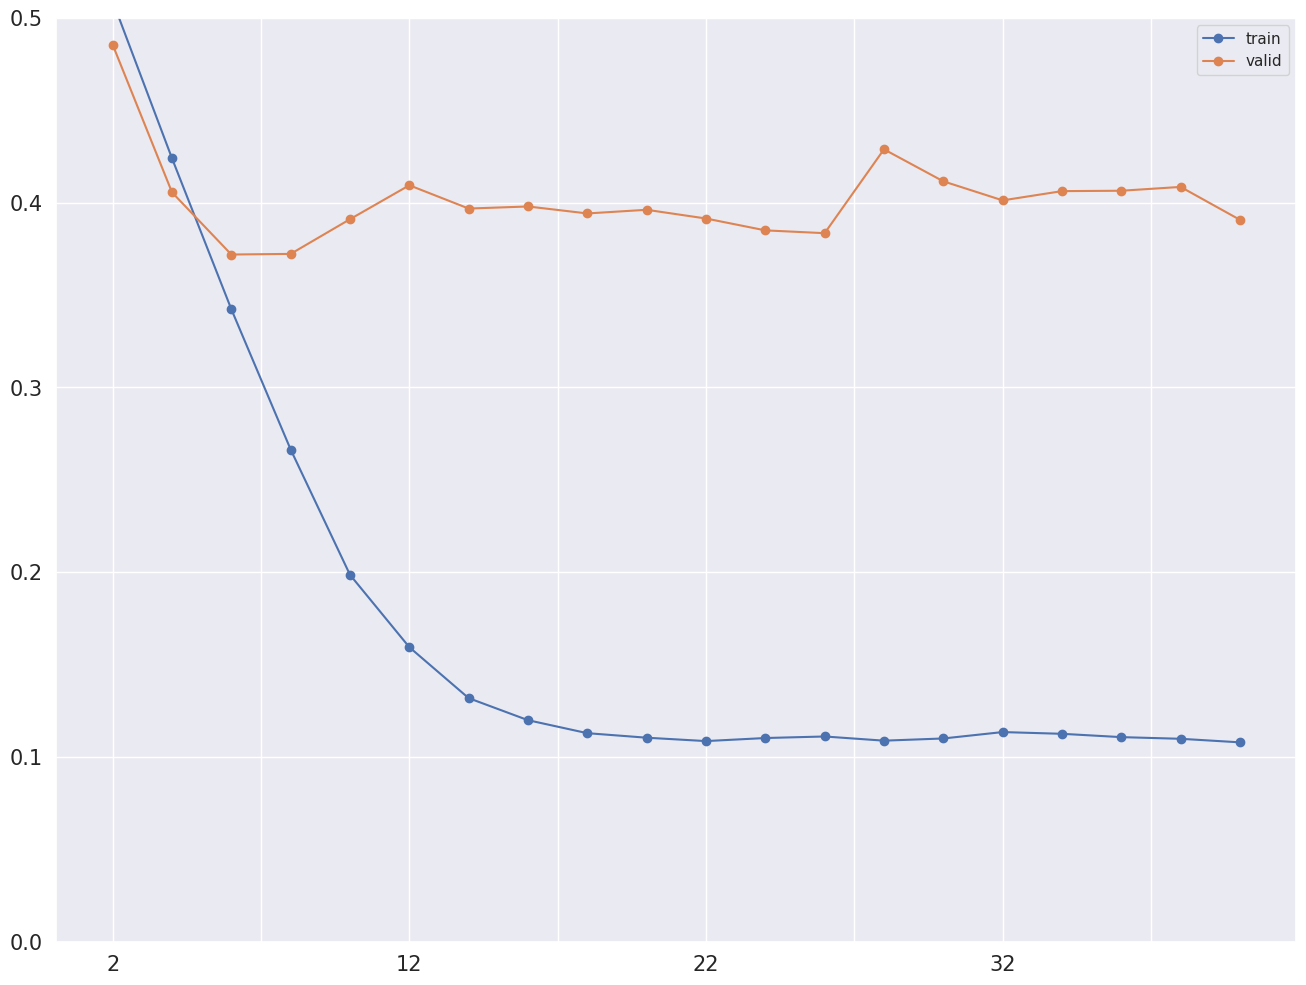

In [14]:
ax = res.plot.line(grid=True, fontsize=15, ylim=(0, 0.5), linestyle='-', style='o')

Ahora, calculamos el área bajo la ROC Curve sobre los mismos modelos


In [15]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["train", "valid"])
for depth in depths:
    learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
    learner.fit(X_train, y_train)
    res.loc[str(depth), "train"] = roc_auc_score(y_train, learner.predict_proba(X_train)[:, -1])
    res.loc[str(depth), "valid"] = roc_auc_score(y_valid, learner.predict_proba(X_valid)[:, -1])

In [16]:
res

,train,valid
2,0.86,0.93
4,0.89,0.95
6,0.93,0.94
8,0.97,0.93
10,0.99,0.90
...,...,...
32,1.00,0.88
34,1.00,0.89
36,1.00,0.89
38,1.00,0.90


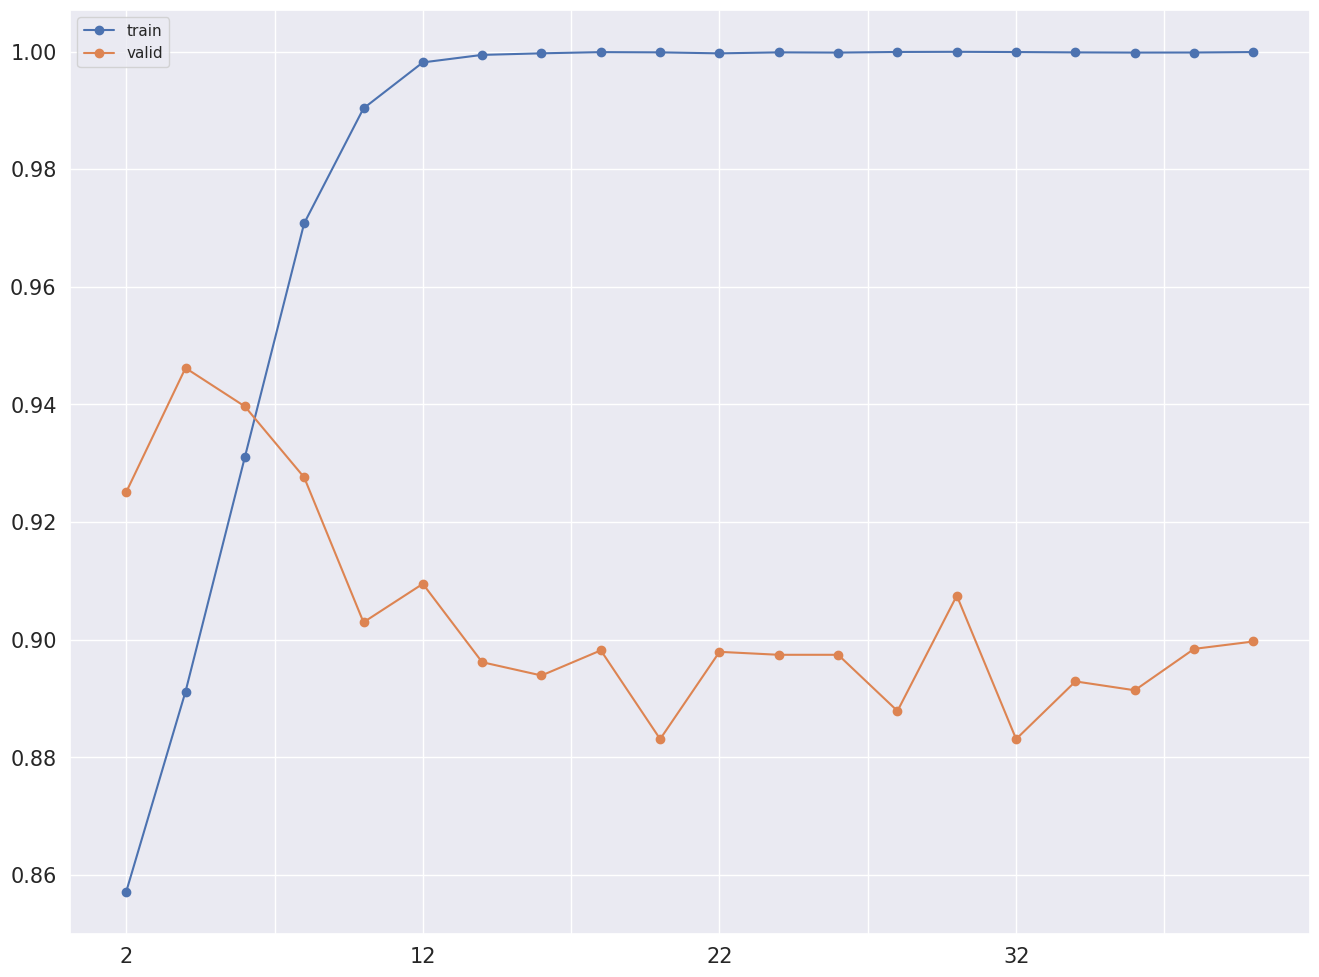

In [17]:
ax = res.plot.line(grid=True, fontsize=15, linestyle='-', style='o')

Veamos como es la supervivencia por deciles

In [18]:
# En Train
pd.crosstab(pd.cut(learner.predict_proba(X_train)[:, -1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), y_train)

Survived,0,1
row_0,,
"(0.1, 0.2]",92,0
"(0.2, 0.3]",35,0
"(0.3, 0.4]",5,0
"(0.4, 0.5]",2,0
"(0.5, 0.6]",0,4
"(0.6, 0.7]",1,38
"(0.7, 0.8]",0,36


In [19]:
# En Test
pd.crosstab(pd.cut(learner.predict_proba(X_valid)[:, -1], [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), y_valid)

Survived,0,1
row_0,,
"(0.1, 0.2]",5,4
"(0.2, 0.3]",10,3
"(0.3, 0.4]",7,2
"(0.4, 0.5]",2,1
"(0.5, 0.6]",0,2
"(0.6, 0.7]",1,6
"(0.7, 0.8]",1,2


## Validación Cruzada en K conjuntos (K-fold cross validation)

Este método consiste en dividir el set de entrenamiento en K subconjuntos disyuntos, para luego iterativamente entrenar el algoritmo en k-1 partes y evaluar en la restante. 

Scikit Learn también tiene funciones para hacer estas divisiones


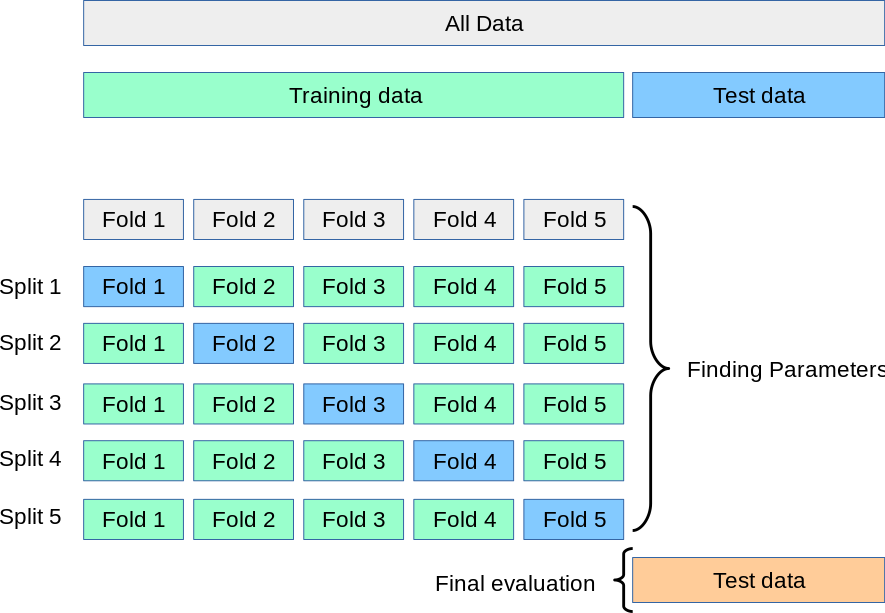

In [20]:
kf = model_selection.KFold(n_splits=5)
folds = [(data.iloc[train_idx].index, data.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(data)]
folds[0]

(Int64Index([180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
             ...
             882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
            dtype='int64', name='PassengerId', length=712),
 Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
            dtype='int64', name='PassengerId', length=179))

Vemos el tamaño de un Fold

In [21]:
folds[0][0].shape, folds[0][1].shape

((712,), (179,))

Ahora entrenamos iterando:
* Para cada uno de los parámetros a entrenar
* Para cada uno de los Folds

In [22]:
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid"])

for depth in depths:
    valid_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = data.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)
        
        X_valid = data.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)
        
        learner = RandomForestClassifier(n_estimators=100, max_depth=depth)
        learner.fit(X_train, y_train)
        probs = pd.Series(learner.predict_proba(X_valid)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(data.loc[valid_probs.index, "Survived"], valid_probs)

In [23]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
2,0.79,0.83,0.86,0.85,0.89,0.84
4,0.82,0.85,0.87,0.87,0.90,0.86
6,0.85,0.84,0.89,0.88,0.91,0.87
8,0.85,0.83,0.88,0.89,0.91,0.87
10,0.85,0.84,0.89,0.89,0.92,0.87
...,...,...,...,...,...,...
32,0.85,0.83,0.89,0.87,0.91,0.86
34,0.85,0.83,0.88,0.88,0.90,0.86
36,0.85,0.83,0.89,0.88,0.91,0.86
38,0.84,0.84,0.89,0.88,0.91,0.86


In [24]:
res.sort_values("valid", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid
10,0.85,0.84,0.89,0.89,0.92,0.87
8,0.85,0.83,0.88,0.89,0.91,0.87
24,0.85,0.84,0.89,0.88,0.91,0.87
6,0.85,0.84,0.89,0.88,0.91,0.87
12,0.84,0.83,0.89,0.89,0.91,0.87
...,...,...,...,...,...,...
28,0.85,0.83,0.89,0.87,0.91,0.86
34,0.85,0.83,0.88,0.88,0.90,0.86
4,0.82,0.85,0.87,0.87,0.90,0.86
22,0.83,0.82,0.89,0.88,0.90,0.86


<Axes: >

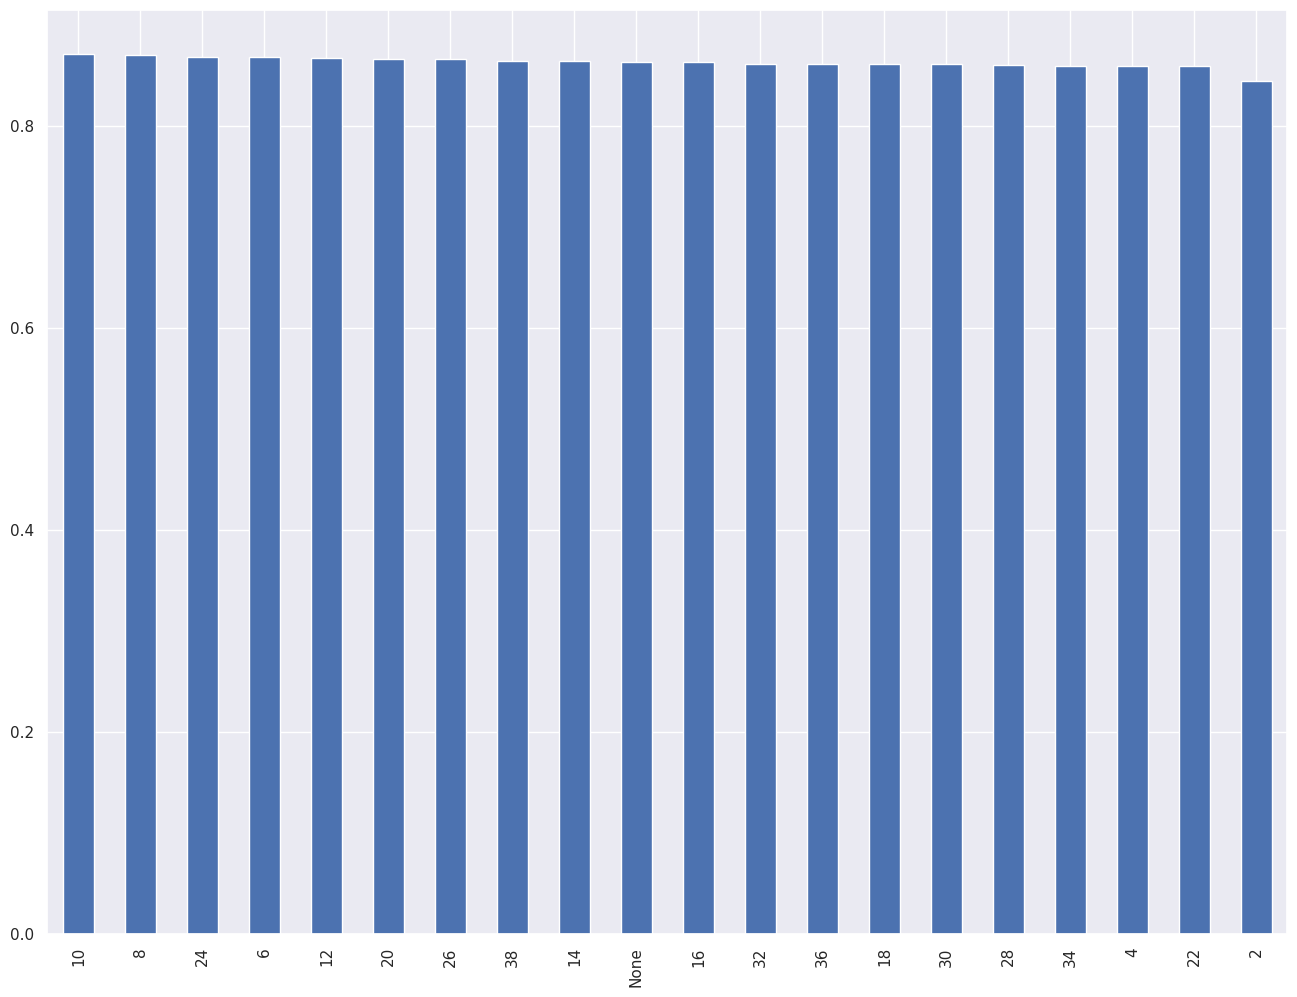

In [25]:
#diagrama de "pareto"
res.sort_values("valid", ascending=False).valid.plot.bar()

<Axes: >

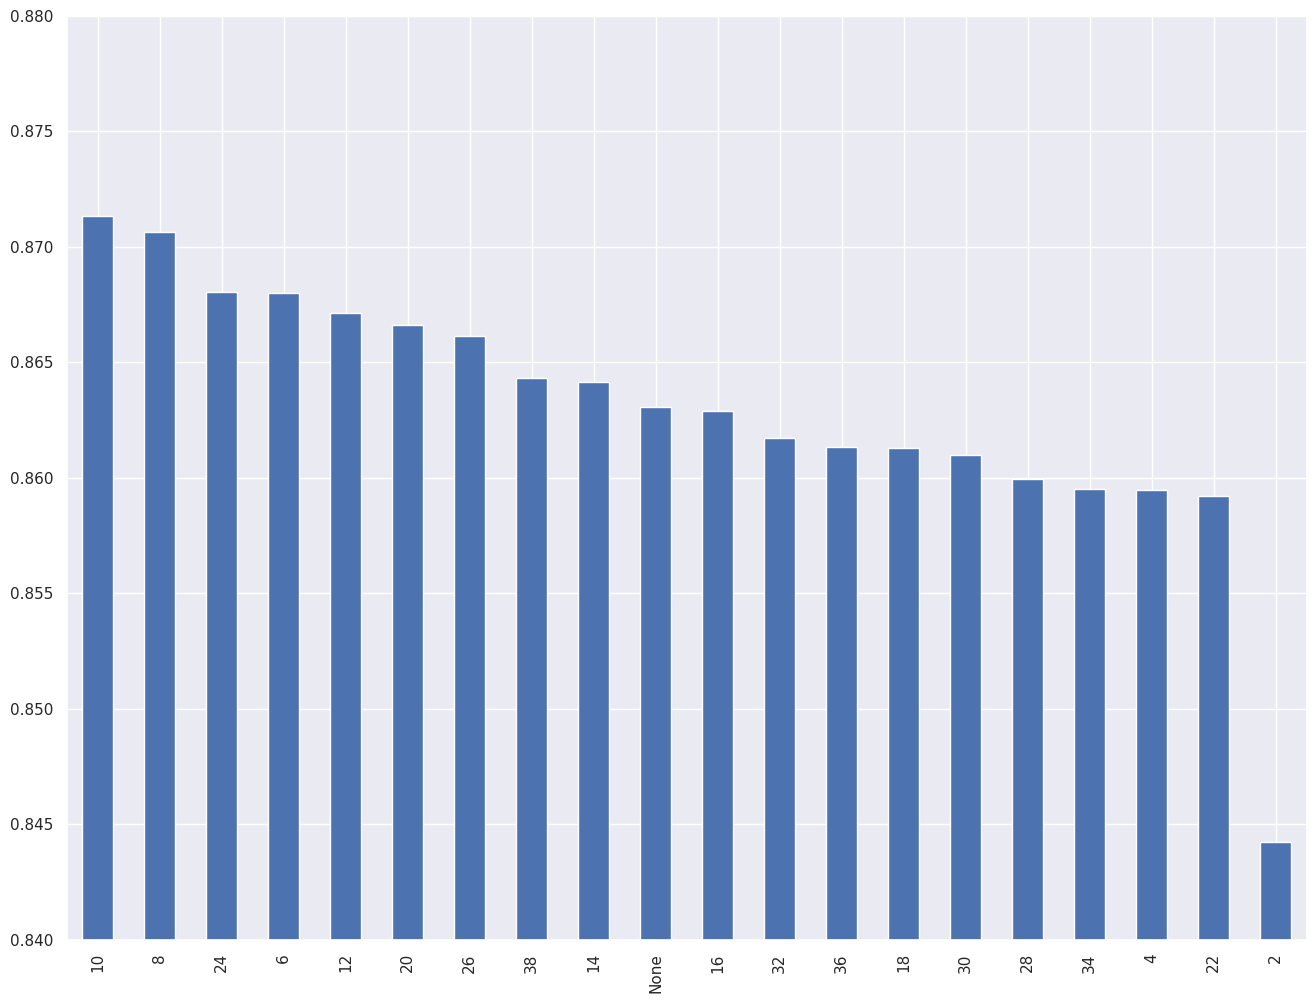

In [26]:
res.sort_values("valid", ascending=False).valid.plot.bar(ylim=(0.84, 0.88))

## Combinación de métodos  y determinación de cantidad de iteraciones

Ambos métodos se pueden combinar para hacer una estimación mas completa, con el beneficio agregado que, para algunso tipos de algoritmos, se puede facilitar la estimación de la cantidad de iteraciones (ej. boosting o redes neuronales)


In [ ]:
train, test = model_selection.train_test_split(data, test_size=0.1, random_state=0)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,NumFam,C,Q,S,Age_nul
PassengerId,,,,,,,,,,,,,,
816,0,1,0,29.70,0,0,634,0.00,138,0,0,0,1,1
878,0,3,0,19.00,0,0,671,7.90,0,0,0,0,1,0
194,1,2,0,3.00,1,1,137,26.00,27,2,0,0,1,0
524,1,1,1,44.00,0,1,290,57.98,63,1,1,0,0,0
635,0,3,1,9.00,3,2,62,27.90,0,5,0,0,1,0


In [ ]:
kf = model_selection.KFold(n_splits=5)
folds = [(train.iloc[train_idx].index, train.iloc[valid_idx].index) for train_idx, valid_idx in kf.split(train)]
folds[0]

(Int64Index([334, 699, 482,  72,  50, 574, 339, 262, 117,  77,
             ...
             724,  10, 360, 708, 764, 836, 193, 630, 560, 685],
            dtype='int64', name='PassengerId', length=640),
 Int64Index([816, 878, 194, 524, 635, 532, 248, 267, 695, 682,
             ...
             821, 383,  21, 586,  66, 681, 879, 305, 824, 522],
            dtype='int64', name='PassengerId', length=161))

In [ ]:
from xgboost import XGBClassifier

In [ ]:
depths = list(range(2, 40, 2))
res = pd.DataFrame([], index=[str(d) for d in depths], columns=["fold_" + str(i) for i in range(len(folds))] + ["valid", "test"])

for depth in depths:
    valid_probs = []
    test_probs = []
    for i, (train_idx, valid_idx) in enumerate(folds):
        X_train = train.loc[train_idx]
        y_train = X_train.Survived
        X_train = X_train.drop("Survived", axis=1)
        
        X_valid = train.loc[valid_idx]
        y_valid = X_valid.Survived
        X_valid = X_valid.drop("Survived", axis=1)
        
        learner = XGBClassifier(n_estimators=10000, max_depth=depth)
        learner.fit(X_train, y_train,  early_stopping_rounds=10, eval_metric="auc",
                    eval_set=[(X_train, y_train),
                              (test.drop("Survived", axis=1), test.Survived),
                              (X_valid, y_valid)])
        probs = pd.Series(learner.predict_proba(X_valid, ntree_limit=learner.best_ntree_limit)[:, -1], index=X_valid.index)
        valid_probs.append(probs)
        res.loc[str(depth), "fold_" + str(i)] = roc_auc_score(y_valid.loc[probs.index], probs)
        probs = pd.Series(learner.predict_proba(test.drop("Survived", axis=1), ntree_limit=learner.best_ntree_limit)[:, -1], index=test.index, name="fold_" + str(i))
        test_probs.append(probs)
    valid_probs = pd.concat(valid_probs)
    res.loc[str(depth), "valid"] = roc_auc_score(train.loc[valid_probs.index, "Survived"], valid_probs)
    test_probs = pd.concat(test_probs, axis=1).mean(axis=1)
    res.loc[str(depth), "test"] = roc_auc_score(test.loc[test_probs.index, "Survived"], test_probs)

[0]	validation_0-auc:0.81488	validation_1-auc:0.83032	validation_2-auc:0.83122
[1]	validation_0-auc:0.84706	validation_1-auc:0.92308	validation_2-auc:0.84025
[2]	validation_0-auc:0.84730	validation_1-auc:0.93112	validation_2-auc:0.84405
[3]	validation_0-auc:0.85037	validation_1-auc:0.92911	validation_2-auc:0.84438
[4]	validation_0-auc:0.85247	validation_1-auc:0.93665	validation_2-auc:0.84539
[5]	validation_0-auc:0.86359	validation_1-auc:0.95073	validation_2-auc:0.84750
[6]	validation_0-auc:0.86724	validation_1-auc:0.94897	validation_2-auc:0.85037
[7]	validation_0-auc:0.86807	validation_1-auc:0.95299	validation_2-auc:0.85003
[8]	validation_0-auc:0.87096	validation_1-auc:0.95375	validation_2-auc:0.86538
[9]	validation_0-auc:0.87429	validation_1-auc:0.95425	validation_2-auc:0.87045
[10]	validation_0-auc:0.87566	validation_1-auc:0.95425	validation_2-auc:0.86758
[11]	validation_0-auc:0.87727	validation_1-auc:0.95576	validation_2-auc:0.86960
[12]	validation_0-auc:0.88164	validation_1-auc:0.9

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_

[9]	validation_0-auc:0.88556	validation_1-auc:0.95551	validation_2-auc:0.83810
[10]	validation_0-auc:0.88685	validation_1-auc:0.95525	validation_2-auc:0.84074
[11]	validation_0-auc:0.89014	validation_1-auc:0.95551	validation_2-auc:0.84049
[12]	validation_0-auc:0.89260	validation_1-auc:0.95726	validation_2-auc:0.84100
[13]	validation_0-auc:0.89427	validation_1-auc:0.95676	validation_2-auc:0.84108
[14]	validation_0-auc:0.89587	validation_1-auc:0.95827	validation_2-auc:0.83827
[15]	validation_0-auc:0.89648	validation_1-auc:0.95827	validation_2-auc:0.83674
[16]	validation_0-auc:0.89777	validation_1-auc:0.96028	validation_2-auc:0.83248
[17]	validation_0-auc:0.89939	validation_1-auc:0.96078	validation_2-auc:0.83035
[18]	validation_0-auc:0.90169	validation_1-auc:0.96078	validation_2-auc:0.83291
[19]	validation_0-auc:0.90258	validation_1-auc:0.96028	validation_2-auc:0.82763
[20]	validation_0-auc:0.90487	validation_1-auc:0.96104	validation_2-auc:0.83257
[21]	validation_0-auc:0.90527	validation_

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[2]	validation_0-auc:0.85045	validation_1-auc:0.88411	validation_2-auc:0.79318
[3]	validation_0-auc:0.85972	validation_1-auc:0.91076	validation_2-auc:0.81851
[4]	validation_0-auc:0.86536	validation_1-auc:0.92358	validation_2-auc:0.82770
[5]	validation_0-auc:0.86806	validation_1-auc:0.93841	validation_2-auc:0.82646
[6]	validation_0-auc:0.87204	validation_1-auc:0.93037	validation_2-auc:0.82779
[7]	validation_0-auc:0.87818	validation_1-auc:0.94143	validation_2-auc:0.83424
[8]	validation_0-auc:0.88031	validation_1-auc:0.95299	validation_2-auc:0.83656
[9]	validation_0-auc:0.87992	validation_1-auc:0.95299	validation_2-auc:0.84128
[10]	validation_0-auc:0.88846	validation_1-auc:0.95928	validation_2-auc:0.84368
[11]	validation_0-auc:0.88999	validation_1-auc:0.96179	validation_2-auc:0.84550
[12]	validation_0-auc:0.89189	validation_1-auc:0.96129	validation_2-auc:0.85296
[13]	validation_0-auc:0.89368	validation_1-auc:0.96028	validation_2-auc:0.85312
[14]	validation_0-auc:0.89637	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[1]	validation_0-auc:0.87382	validation_1-auc:0.94570	validation_2-auc:0.85602
[2]	validation_0-auc:0.88260	validation_1-auc:0.93791	validation_2-auc:0.86969
[3]	validation_0-auc:0.88921	validation_1-auc:0.93942	validation_2-auc:0.87399
[4]	validation_0-auc:0.90634	validation_1-auc:0.94595	validation_2-auc:0.88133
[5]	validation_0-auc:0.91041	validation_1-auc:0.94671	validation_2-auc:0.88774
[6]	validation_0-auc:0.91746	validation_1-auc:0.94495	validation_2-auc:0.87955
[7]	validation_0-auc:0.92194	validation_1-auc:0.94495	validation_2-auc:0.88158
[8]	validation_0-auc:0.92350	validation_1-auc:0.94620	validation_2-auc:0.88158
[9]	validation_0-auc:0.93255	validation_1-auc:0.94646	validation_2-auc:0.87660
[10]	validation_0-auc:0.93570	validation_1-auc:0.94193	validation_2-auc:0.87728
[11]	validation_0-auc:0.93882	validation_1-auc:0.93741	validation_2-auc:0.86657
[12]	validation_0-auc:0.94182	validation_1-auc:0.93539	validation_2-auc:0.87154
[13]	validation_0-auc:0.94443	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[8]	validation_0-auc:0.92744	validation_1-auc:0.94847	validation_2-auc:0.88504
[9]	validation_0-auc:0.93058	validation_1-auc:0.95199	validation_2-auc:0.87758
[10]	validation_0-auc:0.93502	validation_1-auc:0.95148	validation_2-auc:0.88101
[11]	validation_0-auc:0.94102	validation_1-auc:0.95852	validation_2-auc:0.87946
[12]	validation_0-auc:0.94391	validation_1-auc:0.95450	validation_2-auc:0.87740
[13]	validation_0-auc:0.94677	validation_1-auc:0.95148	validation_2-auc:0.87775
[14]	validation_0-auc:0.94814	validation_1-auc:0.95148	validation_2-auc:0.88015
[15]	validation_0-auc:0.95207	validation_1-auc:0.95249	validation_2-auc:0.87981
[0]	validation_0-auc:0.87603	validation_1-auc:0.89191	validation_2-auc:0.81272
[1]	validation_0-auc:0.88551	validation_1-auc:0.90900	validation_2-auc:0.80949
[2]	validation_0-auc:0.89706	validation_1-auc:0.91378	validation_2-auc:0.81802
[3]	validation_0-auc:0.90188	validation_1-auc:0.92408	validation_2-auc:0.82125
[4]	validation_0-auc:0.90459	validation_1-auc:

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[30]	validation_0-auc:0.97609	validation_1-auc:0.93464	validation_2-auc:0.85519
[31]	validation_0-auc:0.97615	validation_1-auc:0.93514	validation_2-auc:0.85768
[32]	validation_0-auc:0.97797	validation_1-auc:0.93514	validation_2-auc:0.85718
[33]	validation_0-auc:0.97947	validation_1-auc:0.93514	validation_2-auc:0.85569
[34]	validation_0-auc:0.98138	validation_1-auc:0.93162	validation_2-auc:0.85718
[35]	validation_0-auc:0.98192	validation_1-auc:0.93112	validation_2-auc:0.85453
[36]	validation_0-auc:0.98274	validation_1-auc:0.92710	validation_2-auc:0.85685
[37]	validation_0-auc:0.98305	validation_1-auc:0.92408	validation_2-auc:0.85867
[38]	validation_0-auc:0.98400	validation_1-auc:0.92257	validation_2-auc:0.85999
[39]	validation_0-auc:0.98458	validation_1-auc:0.92207	validation_2-auc:0.86099
[40]	validation_0-auc:0.98514	validation_1-auc:0.92257	validation_2-auc:0.85933
[41]	validation_0-auc:0.98639	validation_1-auc:0.92459	validation_2-auc:0.85436
[42]	validation_0-auc:0.98796	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[26]	validation_0-auc:0.97669	validation_1-auc:0.89744	validation_2-auc:0.87910
[27]	validation_0-auc:0.97920	validation_1-auc:0.89291	validation_2-auc:0.87405
[28]	validation_0-auc:0.98053	validation_1-auc:0.89593	validation_2-auc:0.86948
[29]	validation_0-auc:0.98105	validation_1-auc:0.89191	validation_2-auc:0.86900
[0]	validation_0-auc:0.88784	validation_1-auc:0.92006	validation_2-auc:0.84961
[1]	validation_0-auc:0.89810	validation_1-auc:0.92710	validation_2-auc:0.87542
[2]	validation_0-auc:0.91016	validation_1-auc:0.93489	validation_2-auc:0.88537
[3]	validation_0-auc:0.91373	validation_1-auc:0.92961	validation_2-auc:0.88748
[4]	validation_0-auc:0.93423	validation_1-auc:0.93389	validation_2-auc:0.88596
[5]	validation_0-auc:0.93967	validation_1-auc:0.93514	validation_2-auc:0.88015
[6]	validation_0-auc:0.94608	validation_1-auc:0.92986	validation_2-auc:0.87821
[7]	validation_0-auc:0.95108	validation_1-auc:0.92961	validation_2-auc:0.87998
[8]	validation_0-auc:0.95715	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[7]	validation_0-auc:0.95979	validation_1-auc:0.87582	validation_2-auc:0.84023
[8]	validation_0-auc:0.96140	validation_1-auc:0.88135	validation_2-auc:0.84015
[9]	validation_0-auc:0.96404	validation_1-auc:0.87959	validation_2-auc:0.83546
[10]	validation_0-auc:0.96799	validation_1-auc:0.87833	validation_2-auc:0.83223
[11]	validation_0-auc:0.97097	validation_1-auc:0.88487	validation_2-auc:0.82524
[12]	validation_0-auc:0.97263	validation_1-auc:0.87783	validation_2-auc:0.82056
[13]	validation_0-auc:0.97765	validation_1-auc:0.87783	validation_2-auc:0.82397
[14]	validation_0-auc:0.98226	validation_1-auc:0.87883	validation_2-auc:0.81817
[15]	validation_0-auc:0.98526	validation_1-auc:0.87934	validation_2-auc:0.82005
[0]	validation_0-auc:0.88661	validation_1-auc:0.91956	validation_2-auc:0.87929
[1]	validation_0-auc:0.90002	validation_1-auc:0.92257	validation_2-auc:0.88762
[2]	validation_0-auc:0.91656	validation_1-auc:0.93389	validation_2-auc:0.89801
[3]	validation_0-auc:0.93521	validation_1-auc:

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[10]	validation_0-auc:0.96952	validation_1-auc:0.93489	validation_2-auc:0.83143
[11]	validation_0-auc:0.97257	validation_1-auc:0.93640	validation_2-auc:0.83665
[12]	validation_0-auc:0.97523	validation_1-auc:0.92634	validation_2-auc:0.83987
[13]	validation_0-auc:0.97575	validation_1-auc:0.91528	validation_2-auc:0.84501
[14]	validation_0-auc:0.97712	validation_1-auc:0.91579	validation_2-auc:0.84435
[15]	validation_0-auc:0.97868	validation_1-auc:0.90749	validation_2-auc:0.84691
[16]	validation_0-auc:0.98220	validation_1-auc:0.91503	validation_2-auc:0.85171
[17]	validation_0-auc:0.98486	validation_1-auc:0.91151	validation_2-auc:0.84708
[18]	validation_0-auc:0.98804	validation_1-auc:0.91202	validation_2-auc:0.83946
[19]	validation_0-auc:0.99041	validation_1-auc:0.90347	validation_2-auc:0.84211
[20]	validation_0-auc:0.99136	validation_1-auc:0.90598	validation_2-auc:0.84459
[21]	validation_0-auc:0.99222	validation_1-auc:0.90749	validation_2-auc:0.84608
[22]	validation_0-auc:0.99250	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[3]	validation_0-auc:0.94339	validation_1-auc:0.92031	validation_2-auc:0.88976
[4]	validation_0-auc:0.95746	validation_1-auc:0.90925	validation_2-auc:0.89626
[5]	validation_0-auc:0.96438	validation_1-auc:0.91654	validation_2-auc:0.89558
[6]	validation_0-auc:0.97184	validation_1-auc:0.91880	validation_2-auc:0.91144
[7]	validation_0-auc:0.97582	validation_1-auc:0.90297	validation_2-auc:0.90646
[8]	validation_0-auc:0.97779	validation_1-auc:0.89593	validation_2-auc:0.90545
[9]	validation_0-auc:0.98091	validation_1-auc:0.90498	validation_2-auc:0.90849
[10]	validation_0-auc:0.98506	validation_1-auc:0.90297	validation_2-auc:0.90562
[11]	validation_0-auc:0.98771	validation_1-auc:0.90347	validation_2-auc:0.90680
[12]	validation_0-auc:0.99047	validation_1-auc:0.90397	validation_2-auc:0.90671
[13]	validation_0-auc:0.99125	validation_1-auc:0.90297	validation_2-auc:0.90334
[14]	validation_0-auc:0.99217	validation_1-auc:0.90347	validation_2-auc:0.90199
[15]	validation_0-auc:0.99426	validation_1-auc:

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[10]	validation_0-auc:0.98399	validation_1-auc:0.91378	validation_2-auc:0.90917
[11]	validation_0-auc:0.98714	validation_1-auc:0.91704	validation_2-auc:0.90496
[12]	validation_0-auc:0.98883	validation_1-auc:0.91654	validation_2-auc:0.90496
[13]	validation_0-auc:0.99019	validation_1-auc:0.91755	validation_2-auc:0.90754
[14]	validation_0-auc:0.99061	validation_1-auc:0.91604	validation_2-auc:0.90513
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91413	validation_1-auc:0.90297	validation_2-auc:0.81197
[2]	validation_0-auc:0.93763	validation_1-auc:0.87733	validation_2-auc:0.80634
[3]	validation_0-auc:0.95695	validation_1-auc:0.88311	validation_2-auc:0.81918
[4]	validation_0-auc:0.96632	validation_1-auc:0.88311	validation_2-auc:0.81553
[5]	validation_0-auc:0.97191	validation_1-auc:0.89216	validation_2-auc:0.80949
[6]	validation_0-auc:0.97547	validation_1-auc:0.89291	validation_2-auc:0.80485
[7]	validation_0-auc:0.97813	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[24]	validation_0-auc:0.99920	validation_1-auc:0.87330	validation_2-auc:0.83855
[25]	validation_0-auc:0.99925	validation_1-auc:0.87079	validation_2-auc:0.84004
[26]	validation_0-auc:0.99933	validation_1-auc:0.86677	validation_2-auc:0.84584
[27]	validation_0-auc:0.99937	validation_1-auc:0.86576	validation_2-auc:0.84517
[28]	validation_0-auc:0.99953	validation_1-auc:0.86978	validation_2-auc:0.84567
[29]	validation_0-auc:0.99967	validation_1-auc:0.87029	validation_2-auc:0.84302
[30]	validation_0-auc:0.99972	validation_1-auc:0.87280	validation_2-auc:0.84418
[31]	validation_0-auc:0.99969	validation_1-auc:0.87129	validation_2-auc:0.84070
[32]	validation_0-auc:0.99980	validation_1-auc:0.87381	validation_2-auc:0.84501
[33]	validation_0-auc:0.99981	validation_1-auc:0.87280	validation_2-auc:0.84269
[34]	validation_0-auc:0.99982	validation_1-auc:0.87230	validation_2-auc:0.84302
[35]	validation_0-auc:0.99984	validation_1-auc:0.87280	validation_2-auc:0.84368
[36]	validation_0-auc:0.99986	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[9]	validation_0-auc:0.98716	validation_1-auc:0.90070	validation_2-auc:0.92046
[10]	validation_0-auc:0.98999	validation_1-auc:0.90397	validation_2-auc:0.91490
[11]	validation_0-auc:0.99138	validation_1-auc:0.90246	validation_2-auc:0.91186
[12]	validation_0-auc:0.99316	validation_1-auc:0.90900	validation_2-auc:0.91220
[13]	validation_0-auc:0.99516	validation_1-auc:0.90850	validation_2-auc:0.90604
[14]	validation_0-auc:0.99581	validation_1-auc:0.91252	validation_2-auc:0.90486
[15]	validation_0-auc:0.99665	validation_1-auc:0.91101	validation_2-auc:0.90418
[16]	validation_0-auc:0.99743	validation_1-auc:0.91202	validation_2-auc:0.90435
[17]	validation_0-auc:0.99775	validation_1-auc:0.91252	validation_2-auc:0.90250
[18]	validation_0-auc:0.99806	validation_1-auc:0.91202	validation_2-auc:0.90165
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-a

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[3]	validation_0-auc:0.95565	validation_1-auc:0.90397	validation_2-auc:0.90093
[4]	validation_0-auc:0.96150	validation_1-auc:0.90598	validation_2-auc:0.90642
[5]	validation_0-auc:0.97050	validation_1-auc:0.91654	validation_2-auc:0.90668
[6]	validation_0-auc:0.97706	validation_1-auc:0.91352	validation_2-auc:0.90282
[7]	validation_0-auc:0.98280	validation_1-auc:0.92660	validation_2-auc:0.90385
[8]	validation_0-auc:0.98546	validation_1-auc:0.91805	validation_2-auc:0.90093
[9]	validation_0-auc:0.98738	validation_1-auc:0.91403	validation_2-auc:0.89870
[10]	validation_0-auc:0.99000	validation_1-auc:0.91704	validation_2-auc:0.90007
[11]	validation_0-auc:0.99125	validation_1-auc:0.91403	validation_2-auc:0.90024
[12]	validation_0-auc:0.99340	validation_1-auc:0.91453	validation_2-auc:0.89715
[13]	validation_0-auc:0.99431	validation_1-auc:0.91755	validation_2-auc:0.89552
[14]	validation_0-auc:0.99585	validation_1-auc:0.91704	validation_2-auc:0.89758
[15]	validation_0-auc:0.99649	validation_1-auc:

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-auc:0.99983	validation_1-auc:0.87481	validation_2-auc:0.84459
[26]	validation_0-auc:0.99989	validation_1-auc:0.87381	validation_2-auc:0.84526
[27]	validation_0-auc:0.99997	validation_1-auc:0.87330	validation_2-auc:0.84641
[28]	validation_0-auc:0.99997	validation_1-auc:0.87682	validation_2-auc:0.84393
[29]	validation_0-auc:0.99997	validation_1-auc:0.87330	validation_2-auc:0.84244
[30]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.84194
[31]	validation_0-auc:0.99998	validation_1-auc:0.87481	validation_2-auc:0.84310
[32]	validation_0-auc:0.99998	validation_1-auc:0.87330	validation_2-auc:0.84526
[33]	validation_0-auc:0.99999	validation_1-auc:0.87381	validation_2-auc:0.84492
[34]	validation_0-auc:0.99999	validation_1-auc:0.86978	validation_2-auc:0.84509
[35]	validation_0-auc:0.99999	validation_1-auc:0.86978	validation_2-auc:0.84426
[36]	validation_0-auc:0.99999	validation_1-auc:0.87280	validation_2-auc:0.84393
[37]	validation_0-auc:0.99999	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[7]	validation_0-auc:0.98427	validation_1-auc:0.92056	validation_2-auc:0.91287
[8]	validation_0-auc:0.98779	validation_1-auc:0.91604	validation_2-auc:0.91835
[9]	validation_0-auc:0.98988	validation_1-auc:0.91051	validation_2-auc:0.91675
[10]	validation_0-auc:0.99249	validation_1-auc:0.90498	validation_2-auc:0.91574
[11]	validation_0-auc:0.99398	validation_1-auc:0.90347	validation_2-auc:0.91439
[12]	validation_0-auc:0.99509	validation_1-auc:0.90045	validation_2-auc:0.91220
[13]	validation_0-auc:0.99654	validation_1-auc:0.90096	validation_2-auc:0.90477
[14]	validation_0-auc:0.99699	validation_1-auc:0.90397	validation_2-auc:0.90697
[15]	validation_0-auc:0.99777	validation_1-auc:0.89945	validation_2-auc:0.90494
[16]	validation_0-auc:0.99846	validation_1-auc:0.90246	validation_2-auc:0.90663
[17]	validation_0-auc:0.99895	validation_1-auc:0.90699	validation_2-auc:0.90612
[18]	validation_0-auc:0.99920	validation_1-auc:0.90246	validation_2-auc:0.90646
[0]	validation_0-auc:0.91149	validation_1-a

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96618	validation_1-auc:0.91302	validation_2-auc:0.89766
[4]	validation_0-auc:0.97439	validation_1-auc:0.91780	validation_2-auc:0.90367
[5]	validation_0-auc:0.97922	validation_1-auc:0.91755	validation_2-auc:0.89921
[6]	validation_0-auc:0.98311	validation_1-auc:0.91554	validation_2-auc:0.89612
[7]	validation_0-auc:0.98581	validation_1-auc:0.92107	validation_2-auc:0.89337
[8]	validation_0-auc:0.98853	validation_1-auc:0.91604	validation_2-auc:0.89337
[9]	validation_0-auc:0.99055	validation_1-auc:0.91403	validation_2-auc:0.89552
[10]	validation_0-auc:0.99185	validation_1-auc:0.91352	validation_2-auc:0.89569
[11]	validation_0-auc:0.99337	validation_1-auc:0.91001	validation_2-auc:0.89724
[12]	validation_0-auc:0.99434	validation_1-auc:0.9

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[2]	validation_0-auc:0.95162	validation_1-auc:0.85646	validation_2-auc:0.80709
[3]	validation_0-auc:0.96504	validation_1-auc:0.83685	validation_2-auc:0.81735
[4]	validation_0-auc:0.97555	validation_1-auc:0.84163	validation_2-auc:0.83193
[5]	validation_0-auc:0.98169	validation_1-auc:0.86149	validation_2-auc:0.81727
[6]	validation_0-auc:0.98629	validation_1-auc:0.86576	validation_2-auc:0.81644
[7]	validation_0-auc:0.98837	validation_1-auc:0.86476	validation_2-auc:0.81363
[8]	validation_0-auc:0.99021	validation_1-auc:0.86652	validation_2-auc:0.82555
[9]	validation_0-auc:0.99178	validation_1-auc:0.86903	validation_2-auc:0.82630
[10]	validation_0-auc:0.99330	validation_1-auc:0.86601	validation_2-auc:0.82837
[11]	validation_0-auc:0.99538	validation_1-auc:0.86828	validation_2-auc:0.83060
[12]	validation_0-auc:0.99646	validation_1-auc:0.86626	validation_2-auc:0.82745
[13]	validation_0-auc:0.99758	validation_1-auc:0.86476	validation_2-auc:0.83209
[14]	validation_0-auc:0.99781	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[3]	validation_0-auc:0.95995	validation_1-auc:0.90473	validation_2-auc:0.88521
[4]	validation_0-auc:0.96955	validation_1-auc:0.90322	validation_2-auc:0.89971
[5]	validation_0-auc:0.97872	validation_1-auc:0.90850	validation_2-auc:0.91000
[6]	validation_0-auc:0.98325	validation_1-auc:0.90649	validation_2-auc:0.92021
[7]	validation_0-auc:0.98604	validation_1-auc:0.89970	validation_2-auc:0.92131
[8]	validation_0-auc:0.98901	validation_1-auc:0.89367	validation_2-auc:0.92299
[9]	validation_0-auc:0.99096	validation_1-auc:0.88964	validation_2-auc:0.91928
[10]	validation_0-auc:0.99315	validation_1-auc:0.89165	validation_2-auc:0.91490
[11]	validation_0-auc:0.99421	validation_1-auc:0.89065	validation_2-auc:0.91034
[12]	validation_0-auc:0.99542	validation_1-auc:0.89165	validation_2-auc:0.91034
[13]	validation_0-auc:0.99673	validation_1-auc:0.89618	validation_2-auc:0.90941
[14]	validation_0-auc:0.99746	validation_1-auc:0.89744	validation_2-auc:0.91043
[15]	validation_0-auc:0.99815	validation_1-auc:

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97409	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97794	validation_1-auc:0.91604	validation_2-auc:0.90556
[6]	validation_0-auc:0.98356	validation_1-auc:0.91579	validation_2-auc:0.90127
[7]	validation_0-auc:0.98610	validation_1-auc:0.91805	validation_2-auc:0.89758
[8]	validation_0-auc:0.98878	validation_1-auc:0.91302	validation_2-auc:0.89706
[9]	validation_0-auc:0.99008	validation_1-auc:0.90799	validation_2-auc:0.89646
[10]	validation_0-auc:0.99152	validation_1-auc:0.90749	validation_2-auc:0.89655
[11]	validation_0-auc:0.99376	validation_1-auc:0.90498	validation_2-auc:0.89183
[12]	validation_0-auc:0.99526	validation_1-auc:0.90297	validation_2-auc:0.89234
[13]	validation_0-auc:0.99666	validation_1-auc:0.90397	validation_2-auc:0.89208
[14]	validation_0-auc:0.99765	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.99673	validation_1-auc:0.88059	validation_2-auc:0.82348
[13]	validation_0-auc:0.99712	validation_1-auc:0.87758	validation_2-auc:0.83077
[14]	validation_0-auc:0.99794	validation_1-auc:0.88612	validation_2-auc:0.82712
[15]	validation_0-auc:0.99859	validation_1-auc:0.88512	validation_2-auc:0.82994
[16]	validation_0-auc:0.99911	validation_1-auc:0.88562	validation_2-auc:0.82497
[17]	validation_0-auc:0.99928	validation_1-auc:0.87959	validation_2-auc:0.82563
[18]	validation_0-auc:0.99948	validation_1-auc:0.88512	validation_2-auc:0.82944
[19]	validation_0-auc:0.99961	validation_1-auc:0.88964	validation_2-auc:0.83209
[20]	validation_0-auc:0.99961	validation_1-auc:0.89065	validation_2-auc:0.83110
[21]	validation_0-auc:0.99963	validation_1-auc:0.88813	validation_2-auc:0.83010
[22]	validation_0-auc:0.99977	validation_1-auc:0.88939	validation_2-auc:0.82878
[23]	validation_0-auc:0.99985	validation_1-auc:0.88788	validation_2-auc:0.82795
[24]	validation_0-auc:0.99988	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.99813	validation_1-auc:0.87934	validation_2-auc:0.85535
[16]	validation_0-auc:0.99871	validation_1-auc:0.88034	validation_2-auc:0.85077
[17]	validation_0-auc:0.99885	validation_1-auc:0.87733	validation_2-auc:0.85377
[18]	validation_0-auc:0.99927	validation_1-auc:0.87682	validation_2-auc:0.85298
[19]	validation_0-auc:0.99957	validation_1-auc:0.87280	validation_2-auc:0.85093
[20]	validation_0-auc:0.99975	validation_1-auc:0.87330	validation_2-auc:0.84738
[21]	validation_0-auc:0.99973	validation_1-auc:0.87230	validation_2-auc:0.84864
[22]	validation_0-auc:0.99986	validation_1-auc:0.87029	validation_2-auc:0.84975
[23]	validation_0-auc:0.99988	validation_1-auc:0.86777	validation_2-auc:0.84801
[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-a

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.99664	validation_1-auc:0.88788	validation_2-auc:0.91085
[14]	validation_0-auc:0.99777	validation_1-auc:0.89040	validation_2-auc:0.90781
[15]	validation_0-auc:0.99810	validation_1-auc:0.88889	validation_2-auc:0.90663
[16]	validation_0-auc:0.99870	validation_1-auc:0.89341	validation_2-auc:0.90165
[17]	validation_0-auc:0.99901	validation_1-auc:0.89040	validation_2-auc:0.89845
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.99717	validation_1-auc:0.88939	validation_2-auc:0.80523
[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.90799	validation_2-auc:0.89414
[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0.87154	validation_2-auc:0.81628
[5]	validation_0-auc:0.98247	validation_1-auc:0.87431	validation_2-auc:0.80419
[6]	validation_0-auc:0.98657	validation_1-auc:0.87858	validation_2-auc:0.80866
[7]	validation_0-auc:0.98778	validation_1-auc:0.87657	validation_2-auc:0.81081
[8]	validation_0-auc:0.99038	validation_1-auc:0.87883	validation_2-auc:0.80825
[9]	validation_0-auc:0.99279	validation_1-auc:0.88235	validation_2-auc:0.81636
[10]	validation_0-auc:0.99407	validation_1-auc:0.88185	validation_2-auc:0.82050
[11]	validation_0-auc:0.99563	validation_1-auc:0.88210	validation_2-auc:0.82249
[12]	validation_0-auc:0.99680	validation_1-auc:0.8

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.99734	validation_1-auc:0.86425	validation_2-auc:0.85788
[14]	validation_0-auc:0.99818	validation_1-auc:0.86425	validation_2-auc:0.85456
[15]	validation_0-auc:0.99857	validation_1-auc:0.86375	validation_2-auc:0.85890
[16]	validation_0-auc:0.99913	validation_1-auc:0.86375	validation_2-auc:0.85795
[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[0]	validation_0-auc:0.89247	validation_

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.99700	validation_1-auc:0.88738	validation_2-auc:0.91177
[14]	validation_0-auc:0.99769	validation_1-auc:0.88889	validation_2-auc:0.91161
[15]	validation_0-auc:0.99860	validation_1-auc:0.88436	validation_2-auc:0.91144
[16]	validation_0-auc:0.99898	validation_1-auc:0.89191	validation_2-auc:0.91296
[17]	validation_0-auc:0.99927	validation_1-auc:0.89341	validation_2-auc:0.91093


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0.90347	validation_2-auc:0.81903
[8]	validation_0-auc:0.99026	validation_1-auc:0.90397	validation_2-auc:0.81494
[9]	validation_0-auc:0.99166	validation_1-auc:0.90498	validation_2-auc:0.81613
[10]	validation_0-auc:0.99372	validation_1-auc:0.90473	validation_2-auc:0.81519
[11]	validation_0-auc:0.99458	validation_1-auc:0.90271	validation_2-auc:0.80719
[12]	validation_0-auc:0.99571	validation_1-auc:0.8

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0.87154	validation_2-auc:0.81628
[5]	validation_0-auc:0.98247	validation_1-auc:0.87431	validation_2-auc:0.80419
[6]	validation_0-auc:0.98657	validation_1-auc:0.87858	validation_2-auc:0.80866
[7]	validation_0-auc:0.98778	validation_1-auc:0.87657	validation_2-auc:0.81081
[8]	validation_0-auc:0.99038	validation_1-auc:0.87883	validation_2-auc:0.80825
[9]	validation_0-auc:0.99279	validation_1-auc:0.88235	validation_2-auc:0.81636
[10]	validation_0-auc:0.99407	validation_1-auc:0.88185	validation_2-auc:0.82050
[11]	validation_0-auc:0.99563	validation_1-auc:0.88210	validation_2-auc:0.82249
[12]	validation_0-auc:0.99680	validation_1-auc:0.8

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-auc:0.90473	validation_2-auc:0.88521
[4]	validation_0-auc:0.96955	validation_1-au

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.99927	validation_1-auc:0.89392	validation_2-auc:0.90233
[18]	validation_0-auc:0.99959	validation_1-auc:0.89392	validation_2-auc:0.90148
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0.90347	validation_2-auc:0.81903
[8]	validation_0-auc:0.99026	validation_1-auc:0.90397	validation_2-auc:0.81494
[9]	validation_0-auc:0.99166	validation_1-auc:0.90498	validation_2-auc:0.81613
[10]	validation_0-auc:0.99372	validation_1-auc:0.9

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation_1-auc:0.88939	validation_2-auc:0.83193
[24]	validation_0-auc:0.99994	validation_1-auc:0.88688	validation_2-auc:0.83424
[25]	validation_0-auc:0.99996	validation_1-auc:0.89140	validation_2-auc:0.83358
[26]	validation_0-auc:0.99998	validation_1-auc:0.88738	validation_2-auc:0.83342
[27]	validation_0-auc:0.99995	validation_1-auc:0.88889	validation_2-auc:0.83540
[28]	validation_0-auc:0.99996	validation_1-auc:0.88939	validation_2-auc:0.83491
[29]	validation_0-auc:0.99998	validation_1-auc:0.88989	validation_2-auc:0.83722
[30]	validation_0-auc:0.99999	validation_1-auc:0.89090	validation_2-auc:0.83739
[31]	validation_0-auc:0.99998	validation_1-auc:0.88738	validation_2-auc:0.83557
[32]	validation_0-auc:0.99999	validation_1-auc:0.88788	validation_2-auc:0.83557
[33]	validation_0-auc:0.99999	validation_1-auc:0.88487	validation_2-auc:0.83524
[34]	validation_0-auc:0.99999	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[25]	validation_0-auc:0.99995	validation_1-auc:0.87431	validation_2-auc:0.85188
[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-auc:0.90473	validation_2-auc:0.88521
[4]	validation_0-auc:0.96955	validation_1-auc:0.90322	validation_2-auc:0.89971
[5]	validation_0-auc:0.97872	validation_1-auc

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.99948	validation_1-auc:0.88989	validation_2-auc:0.90536
[18]	validation_0-auc:0.99958	validation_1-auc:0.88587	validation_2-auc:0.90553
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0.90347	validation_2-auc:0.81903
[8]	validation_0-auc:0.99026	validation_1-auc:0.90397	validation_2-auc:0.81494
[9]	validation_0-auc:0.99166	validation_1-auc:0.90498	validation_2-auc:0.81613
[10]	validation_0-auc:0.99372	validation_1-auc:0.9

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation_1-auc:0.88939	validation_2-auc:0.83193
[24]	validation_0-auc:0.99994	validation_1-auc:0.88688	validation_2-auc:0.83424
[25]	validation_0-auc:0.99996	validation_1-auc:0.89140	validation_2-auc:0.83358
[26]	validation_0-auc:0.99998	validation_1-auc:0.88738	validation_2-auc:0.83342
[27]	validation_0-auc:0.99995	validation_1-auc:0.88889	validation_2-auc:0.83540
[28]	validation_0-auc:0.99996	validation_1-auc:0.88939	validation_2-auc:0.83491
[29]	validation_0-auc:0.99998	validation_1-auc:0.88989	validation_2-auc:0.83722
[30]	validation_0-auc:0.99999	validation_1-auc:0.89090	validation_2-auc:0.83739
[31]	validation_0-auc:0.99998	validation_1-auc:0.88738	validation_2-auc:0.83557
[32]	validation_0-auc:0.99999	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.99913	validation_1-auc:0.86375	validation_2-auc:0.85795
[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-a

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0.90347	validation_2-auc:0.81903
[8]	validation_0-auc:0.99026	validation_1-auc:0.90397	validation_2-auc:0.81494
[9]	validation_0-auc:0.99166	validation_1-auc:0.90498	validation_2-auc:0.81613
[10]	validation_0-auc:0.99372	validation_1-auc:0.90473	validation_2-auc:0.81519
[11]	validation_0-auc:0.99458	validation_1-auc:0.90271	validation_2-auc:0.80719
[12]	validation_0-auc:0.99571	validation_1-auc:0.8

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.99926	validation_1-auc:0.88864	validation_2-auc:0.82994
[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation_1-auc:0.88939	validation_2-auc:0.83193
[24]	validation_0-auc:0.99994	validation_1-auc:0.88688	validation_2-auc:0.83424
[25]	validation_0-auc:0.99996	validation_1-auc:0.89140	validation_2-auc:0.83358
[26]	validation_0-auc:0.99998	validation_1-auc:0.88738	validation_2-auc:0.83342
[27]	validation_0-auc:0.99995	validation_1-auc:0.88889	validation_2-auc:0.83540
[28]	validation_0-auc:0.99996	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-auc:0.90473	validation_2-auc:0.88521
[4]	validation_0-auc:0.96955	validation_1-au

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-auc:0.99958	validation_1-auc:0.88587	validation_2-auc:0.90553
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0.90347	validation_2-auc:0.81903
[8]	validation_0-auc:0.99026	validation_1-auc:0.90397	validation_2-auc:0.81494
[9]	validation_0-auc:0.99166	validation_1-auc:0.90498	validation_2-auc:0.81613
[10]	validation_0-auc:0.99372	validation_1-auc:0.90473	validation_2-auc:0.81519
[11]	validation_0-auc:0.99458	validation_1-auc:0.9

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/loca

[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.90799	validation_2-auc:0.89414
[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation_1-auc:0.88939	validation_2-auc:0.83193
[24]	validation_0-auc:0.99994	validation_1-auc:0.88688	validation_2-auc:0.83424
[25]	validation_0-auc:0.99996	validation_1-auc:0.89140	validation_2-auc:0.83358
[26]	validation_0-auc:0.99998	validation_1-auc:0.88738	validation_2-auc:0.83342
[27]	validation_0-auc:0.99995	validation_1-auc:0.88889	validation_2-auc:0.83540
[28]	validation_0-auc:0.99996	validation_1-auc:0.88939	validation_2-auc:0.83491
[29]	validation_0-auc:0.99998	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-auc:0.90473	validation_2-auc:0.88521
[4]	validation_0-auc:0.96955	validation_1-auc:0.90322	validation_2-auc:0.89971
[5]	validation_0-auc:0.97872	validation_1-auc:0.90850	validation_2-auc:0.91000
[6]	validation_0-auc:0.98325	validation_1-auc:0.90649	validation_2-auc:0.92021
[7]	validation_0-auc:0.98604	validation_1-auc:0.89970	validation_2-auc:0.92131
[8]	validation_0-auc:0.98907	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.99753	validation_1-auc:0.88638	validation_2-auc:0.91203
[15]	validation_0-auc:0.99850	validation_1-auc:0.89392	validation_2-auc:0.91026
[16]	validation_0-auc:0.99904	validation_1-auc:0.89090	validation_2-auc:0.90924
[17]	validation_0-auc:0.99948	validation_1-auc:0.88989	validation_2-auc:0.90536
[18]	validation_0-auc:0.99958	validation_1-auc:0.88587	validation_2-auc:0.90553
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.99372	validation_1-auc:0.90473	validation_2-auc:0.81519
[11]	validation_0-auc:0.99458	validation_1-auc:0.90271	validation_2-auc:0.80719
[12]	validation_0-auc:0.99571	validation_1-auc:0.89593	validation_2-auc:0.80514
[13]	validation_0-auc:0.99662	validation_1-auc:0.89040	validation_2-auc:0.80216
[14]	validation_0-auc:0.99717	validation_1-auc:0.88939	validation_2-auc:0.80523
[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380
[15]	validation_0-auc:0.99853	validation_1-auc:0.89844	validation_2-auc:0.89123
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0.87154	validation_2-auc:0.81628
[5]	validation_0-auc:0.98247	validation_1-auc:0.87431	validation_2-auc:0.80419
[6]	validation_0-auc:0.98657	validation_1-auc:0.87858	validation_2-auc:0.80866
[7]	validation_0-auc:0.98778	validation_1-auc:0.87657	validation_2-auc:0.81081
[8]	validation_0-auc:0.99038	validation_1-auc:0.87883	validation_2-auc:0.80825
[9]	validation_0-auc:0.99279	validation_1-auc:0.88235	validation_2-auc:0.81636
[10]	validation_0-auc:0.99407	validation_1-auc:0.8

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.99563	validation_1-auc:0.88210	validation_2-auc:0.82249
[12]	validation_0-auc:0.99680	validation_1-auc:0.88059	validation_2-auc:0.82332
[13]	validation_0-auc:0.99749	validation_1-auc:0.87908	validation_2-auc:0.83126
[14]	validation_0-auc:0.99836	validation_1-auc:0.88411	validation_2-auc:0.83242
[15]	validation_0-auc:0.99888	validation_1-auc:0.88663	validation_2-auc:0.82911
[16]	validation_0-auc:0.99926	validation_1-auc:0.88864	validation_2-auc:0.82994
[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.99443	validation_1-auc:0.86325	validation_2-auc:0.85093
[12]	validation_0-auc:0.99610	validation_1-auc:0.86476	validation_2-auc:0.85235
[13]	validation_0-auc:0.99734	validation_1-auc:0.86425	validation_2-auc:0.85788
[14]	validation_0-auc:0.99818	validation_1-auc:0.86425	validation_2-auc:0.85456
[15]	validation_0-auc:0.99857	validation_1-auc:0.86375	validation_2-auc:0.85890
[16]	validation_0-auc:0.99913	validation_1-auc:0.86375	validation_2-auc:0.85795
[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.97872	validation_1-auc:0.90850	validation_2-auc:0.91000
[6]	validation_0-auc:0.98325	validation_1-auc:0.90649	validation_2-auc:0.92021
[7]	validation_0-auc:0.98604	validation_1-auc:0.89970	validation_2-auc:0.92131
[8]	validation_0-auc:0.98907	validation_1-auc:0.89367	validation_2-auc:0.92333
[9]	validation_0-auc:0.99099	validation_1-auc:0.88864	validation_2-auc:0.91911
[10]	validation_0-auc:0.99321	validation_1-auc:0.89216	validation_2-auc:0.91456
[11]	validation_0-auc:0.99460	validation_1-auc:0.88964	validation_2-auc:0.90983
[12]	validation_0-auc:0.99606	validation_1-auc:0.88914	validation_2-auc:0.91017
[13]	validation_0-auc:0.99692	validation_1-auc:0.88336	validation_2-auc:0.91000
[14]	validation_0-auc:0.99753	validation_1-auc:0.88638	validation_2-auc:0.91203
[15]	validation_0-auc:0.99850	validation_1-auc:0.89392	validation_2-auc:0.91026
[16]	validation_0-auc:0.99904	validation_1-auc:0.89090	validation_2-auc:0.90924
[17]	validation_0-auc:0.99948	validation_1-au

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.99372	validation_1-auc:0.90473	validation_2-auc:0.81519
[11]	validation_0-auc:0.99458	validation_1-auc:0.90271	validation_2-auc:0.80719
[12]	validation_0-auc:0.99571	validation_1-auc:0.89593	validation_2-auc:0.80514
[13]	validation_0-auc:0.99662	validation_1-auc:0.89040	validation_2-auc:0.80216
[14]	validation_0-auc:0.99717	validation_1-auc:0.88939	validation_2-auc:0.80523
[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.90799	validation_2-auc:0.89414
[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.99836	validation_1-auc:0.88411	validation_2-auc:0.83242
[15]	validation_0-auc:0.99888	validation_1-auc:0.88663	validation_2-auc:0.82911
[16]	validation_0-auc:0.99926	validation_1-auc:0.88864	validation_2-auc:0.82994
[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation_1-auc:0.88939	validation_2-auc:0.83193
[24]	validation_0-auc:0.99994	validation_1-auc:0.88688	validation_2-auc:0.83424
[25]	validation_0-auc:0.99996	validation_1-auc:0.89140	validation_2-auc:0.83358
[26]	validation_0-auc:0.99998	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.99610	validation_1-auc:0.86476	validation_2-auc:0.85235
[13]	validation_0-auc:0.99734	validation_1-auc:0.86425	validation_2-auc:0.85788
[14]	validation_0-auc:0.99818	validation_1-auc:0.86425	validation_2-auc:0.85456
[15]	validation_0-auc:0.99857	validation_1-auc:0.86375	validation_2-auc:0.85890
[16]	validation_0-auc:0.99913	validation_1-auc:0.86375	validation_2-auc:0.85795
[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.99460	validation_1-auc:0.88964	validation_2-auc:0.90983
[12]	validation_0-auc:0.99606	validation_1-auc:0.88914	validation_2-auc:0.91017
[13]	validation_0-auc:0.99692	validation_1-auc:0.88336	validation_2-auc:0.91000
[14]	validation_0-auc:0.99753	validation_1-auc:0.88638	validation_2-auc:0.91203
[15]	validation_0-auc:0.99850	validation_1-auc:0.89392	validation_2-auc:0.91026
[16]	validation_0-auc:0.99904	validation_1-auc:0.89090	validation_2-auc:0.90924
[17]	validation_0-auc:0.99948	validation_1-auc:0.88989	validation_2-auc:0.90536
[18]	validation_0-auc:0.99958	validation_1-auc:0.88587	validation_2-auc:0.90553
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-au

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.99458	validation_1-auc:0.90271	validation_2-auc:0.80719
[12]	validation_0-auc:0.99571	validation_1-auc:0.89593	validation_2-auc:0.80514
[13]	validation_0-auc:0.99662	validation_1-auc:0.89040	validation_2-auc:0.80216
[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.9

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.90799	validation_2-auc:0.89414
[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380
[15]	validation_0-auc:0.99853	validation_1-auc:0.89844	validation_2-auc:0.89123
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0.87154	validation_2-auc:0.81628
[5]	validation_0-auc:0.98247	validation_1-auc:0.87431	validation_2-auc:0.80419
[6]	validation_0-auc:0.98657	validation_1-auc:0.87858	validation_2-auc:0.80866
[7]	validation_0-auc:0.98778	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-auc:0.99749	validation_1-auc:0.87908	validation_2-auc:0.83126
[14]	validation_0-auc:0.99836	validation_1-auc:0.88411	validation_2-auc:0.83242
[15]	validation_0-auc:0.99888	validation_1-auc:0.88663	validation_2-auc:0.82911
[16]	validation_0-auc:0.99926	validation_1-auc:0.88864	validation_2-auc:0.82994
[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation_1-auc:0.88939	validation_2-auc:0.83193
[24]	validation_0-auc:0.99994	validation_1-auc:0.88688	validation_2-auc:0.83424
[25]	validation_0-auc:0.99996	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.99329	validation_1-auc:0.86325	validation_2-auc:0.85133
[11]	validation_0-auc:0.99443	validation_1-auc:0.86325	validation_2-auc:0.85093
[12]	validation_0-auc:0.99610	validation_1-auc:0.86476	validation_2-auc:0.85235
[13]	validation_0-auc:0.99734	validation_1-auc:0.86425	validation_2-auc:0.85788
[14]	validation_0-auc:0.99818	validation_1-auc:0.86425	validation_2-auc:0.85456
[15]	validation_0-auc:0.99857	validation_1-auc:0.86375	validation_2-auc:0.85890
[16]	validation_0-auc:0.99913	validation_1-auc:0.86375	validation_2-auc:0.85795
[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.99099	validation_1-auc:0.88864	validation_2-auc:0.91911
[10]	validation_0-auc:0.99321	validation_1-auc:0.89216	validation_2-auc:0.91456
[11]	validation_0-auc:0.99460	validation_1-auc:0.88964	validation_2-auc:0.90983
[12]	validation_0-auc:0.99606	validation_1-auc:0.88914	validation_2-auc:0.91017
[13]	validation_0-auc:0.99692	validation_1-auc:0.88336	validation_2-auc:0.91000
[14]	validation_0-auc:0.99753	validation_1-auc:0.88638	validation_2-auc:0.91203
[15]	validation_0-auc:0.99850	validation_1-auc:0.89392	validation_2-auc:0.91026
[16]	validation_0-auc:0.99904	validation_1-auc:0.89090	validation_2-auc:0.90924
[17]	validation_0-auc:0.99948	validation_1-auc:0.88989	validation_2-auc:0.90536
[18]	validation_0-auc:0.99958	validation_1-auc:0.88587	validation_2-auc:0.90553
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-a

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.99166	validation_1-auc:0.90498	validation_2-auc:0.81613
[10]	validation_0-auc:0.99372	validation_1-auc:0.90473	validation_2-auc:0.81519
[11]	validation_0-auc:0.99458	validation_1-auc:0.90271	validation_2-auc:0.80719
[12]	validation_0-auc:0.99571	validation_1-auc:0.89593	validation_2-auc:0.80514
[13]	validation_0-auc:0.99662	validation_1-auc:0.89040	validation_2-auc:0.80216
[14]	validation_0-auc:0.99717	validation_1-auc:0.88939	validation_2-auc:0.80523
[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.90799	validation_2-auc:0.89414
[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380
[15]	validation_0-auc:0.99853	validation_1-auc:0.89844	validation_2-auc:0.89123
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0.87154	validation_2-auc:0.81628
[5]	validation_0-auc:0.98247	validation_1-auc:0.87431	validation_2-auc:0.80419
[6]	validation_0-auc:0.98657	validation_1-auc:0.87858	validation_2-auc:0.80866
[7]	validation_0-auc:0.98778	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-auc:0.99563	validation_1-auc:0.88210	validation_2-auc:0.82249
[12]	validation_0-auc:0.99680	validation_1-auc:0.88059	validation_2-auc:0.82332
[13]	validation_0-auc:0.99749	validation_1-auc:0.87908	validation_2-auc:0.83126
[14]	validation_0-auc:0.99836	validation_1-auc:0.88411	validation_2-auc:0.83242
[15]	validation_0-auc:0.99888	validation_1-auc:0.88663	validation_2-auc:0.82911
[16]	validation_0-auc:0.99926	validation_1-auc:0.88864	validation_2-auc:0.82994
[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-auc:0.99913	validation_1-auc:0.86375	validation_2-auc:0.85795
[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[25]	validation_0-auc:0.99995	validation_1-auc:0.87431	validation_2-auc:0.85188


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-auc:0.90473	validation_2-auc:0.88521
[4]	validation_0-auc:0.96955	validation_1-auc:0.90322	validation_2-auc:0.89971
[5]	validation_0-auc:0.97872	validation_1-auc:0.90850	validation_2-auc:0.91000
[6]	validation_0-auc:0.98325	validation_1-auc:0.90649	validation_2-auc:0.92021
[7]	validation_0-auc:0.98604	validation_1-auc:0.89970	validation_2-auc:0.92131
[8]	validation_0-auc:0.98907	validation_1-auc:0.89367	validation_2-auc:0.92333
[9]	validation_0-auc:0.99099	validation_1-auc:0.88864	validation_2-auc:0.91911
[10]	validation_0-auc:0.99321	validation_1-auc:0.89216	validation_2-auc:0.91456
[11]	validation_0-auc:0.99460	validation_1-auc:0.88964	validation_2-auc:0.90983
[12]	validation_0-auc:0.99606	validation_1-auc:0.8

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.90900	validation_2-auc:0.89818
[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.90799	validation_2-auc:0.89414
[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0.87154	validation_2-auc:0.81628
[5]	validation_0-auc:0.98247	validation_1-auc:0.87431	validation_2-auc:0.80419
[6]	validation_0-auc:0.98657	validation_1-auc:0

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-auc:0.99407	validation_1-auc:0.88185	validation_2-auc:0.82050
[11]	validation_0-auc:0.99563	validation_1-auc:0.88210	validation_2-auc:0.82249
[12]	validation_0-auc:0.99680	validation_1-auc:0.88059	validation_2-auc:0.82332
[13]	validation_0-auc:0.99749	validation_1-auc:0.87908	validation_2-auc:0.83126
[14]	validation_0-auc:0.99836	validation_1-auc:0.88411	validation_2-auc:0.83242
[15]	validation_0-auc:0.99888	validation_1-auc:0.88663	validation_2-auc:0.82911
[16]	validation_0-auc:0.99926	validation_1-auc:0.88864	validation_2-auc:0.82994
[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[0]	validation_0-auc:0.89247	validation_1-auc:0.91805	validation_2-auc:0.85054
[1]	validation_0-auc:0.91060	validation_1-auc:0.92836	validation_2-auc:0.88360
[2]	validation_0-auc:0.94688	validation_1-auc:0.91076	validation_2-auc:0.89693
[3]	validation_0-auc:0.95995	validation_1-auc:0.90473	validation_2-auc:0.88521
[4]	validation_0-auc:0.96955	validation_1-au

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-auc:0.99850	validation_1-auc:0.89392	validation_2-auc:0.91026
[16]	validation_0-auc:0.99904	validation_1-auc:0.89090	validation_2-auc:0.90924
[17]	validation_0-auc:0.99948	validation_1-auc:0.88989	validation_2-auc:0.90536
[18]	validation_0-auc:0.99958	validation_1-auc:0.88587	validation_2-auc:0.90553
[0]	validation_0-auc:0.91149	validation_1-auc:0.90422	validation_2-auc:0.79842
[1]	validation_0-auc:0.92184	validation_1-auc:0.90020	validation_2-auc:0.80020
[2]	validation_0-auc:0.93265	validation_1-auc:0.89995	validation_2-auc:0.82081
[3]	validation_0-auc:0.96516	validation_1-auc:0.90045	validation_2-auc:0.83010
[4]	validation_0-auc:0.97224	validation_1-auc:0.90724	validation_2-auc:0.83112
[5]	validation_0-auc:0.97986	validation_1-auc:0.90347	validation_2-auc:0.82448
[6]	validation_0-auc:0.98545	validation_1-auc:0.90347	validation_2-auc:0.82439
[7]	validation_0-auc:0.98855	validation_1-auc:0.90347	validation_2-auc:0.81903
[8]	validation_0-auc:0.99026	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.99717	validation_1-auc:0.88939	validation_2-auc:0.80523
[0]	validation_0-auc:0.89335	validation_1-auc:0.93012	validation_2-auc:0.87998
[1]	validation_0-auc:0.91350	validation_1-auc:0.91855	validation_2-auc:0.89492
[2]	validation_0-auc:0.95651	validation_1-auc:0.91554	validation_2-auc:0.89380
[3]	validation_0-auc:0.96731	validation_1-auc:0.91352	validation_2-auc:0.89698
[4]	validation_0-auc:0.97423	validation_1-auc:0.91453	validation_2-auc:0.90153
[5]	validation_0-auc:0.97837	validation_1-auc:0.91604	validation_2-auc:0.90522
[6]	validation_0-auc:0.98346	validation_1-auc:0.91478	validation_2-auc:0.90161
[7]	validation_0-auc:0.98664	validation_1-auc:0.92283	validation_2-auc:0.89973
[8]	validation_0-auc:0.98905	validation_1-auc:0.91830	validation_2-auc:0.89672
[9]	validation_0-auc:0.99065	validation_1-auc:0.91780	validation_2-auc:0.89724
[10]	validation_0-auc:0.99225	validation_1-auc:0.91026	validation_2-auc:0.89818
[11]	validation_0-auc:0.99401	validation_1-auc:0.9

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-auc:0.99511	validation_1-auc:0.90950	validation_2-auc:0.89406
[13]	validation_0-auc:0.99670	validation_1-auc:0.90799	validation_2-auc:0.89414
[14]	validation_0-auc:0.99755	validation_1-auc:0.90397	validation_2-auc:0.89380
[15]	validation_0-auc:0.99853	validation_1-auc:0.89844	validation_2-auc:0.89123
[0]	validation_0-auc:0.89865	validation_1-auc:0.90724	validation_2-auc:0.80899
[1]	validation_0-auc:0.91410	validation_1-auc:0.90246	validation_2-auc:0.81197
[2]	validation_0-auc:0.95353	validation_1-auc:0.85797	validation_2-auc:0.80626
[3]	validation_0-auc:0.96874	validation_1-auc:0.86501	validation_2-auc:0.82133
[4]	validation_0-auc:0.97809	validation_1-auc:0.87154	validation_2-auc:0.81628
[5]	validation_0-auc:0.98247	validation_1-auc:0.87431	validation_2-auc:0.80419
[6]	validation_0-auc:0.98657	validation_1-auc:0.87858	validation_2-auc:0.80866
[7]	validation_0-auc:0.98778	validation_1-auc:0.87657	validation_2-auc:0.81081
[8]	validation_0-auc:0.99038	validation_1-auc:0.

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-auc:0.99836	validation_1-auc:0.88411	validation_2-auc:0.83242
[15]	validation_0-auc:0.99888	validation_1-auc:0.88663	validation_2-auc:0.82911
[16]	validation_0-auc:0.99926	validation_1-auc:0.88864	validation_2-auc:0.82994
[17]	validation_0-auc:0.99922	validation_1-auc:0.88663	validation_2-auc:0.83275
[18]	validation_0-auc:0.99947	validation_1-auc:0.88411	validation_2-auc:0.83424
[19]	validation_0-auc:0.99953	validation_1-auc:0.88562	validation_2-auc:0.83458
[20]	validation_0-auc:0.99965	validation_1-auc:0.88361	validation_2-auc:0.83275
[21]	validation_0-auc:0.99975	validation_1-auc:0.88939	validation_2-auc:0.83010
[22]	validation_0-auc:0.99983	validation_1-auc:0.88688	validation_2-auc:0.83308
[23]	validation_0-auc:0.99990	validation_1-auc:0.88939	validation_2-auc:0.83193
[24]	validation_0-auc:0.99994	validation_1-auc:0.88688	validation_2-auc:0.83424
[25]	validation_0-auc:0.99996	validation_1-auc:0.89140	validation_2-auc:0.83358
[26]	validation_0-auc:0.99998	validation

/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-auc:0.99942	validation_1-auc:0.86727	validation_2-auc:0.85795
[18]	validation_0-auc:0.99956	validation_1-auc:0.86677	validation_2-auc:0.85811
[19]	validation_0-auc:0.99966	validation_1-auc:0.86325	validation_2-auc:0.85590
[20]	validation_0-auc:0.99976	validation_1-auc:0.86476	validation_2-auc:0.85874
[21]	validation_0-auc:0.99990	validation_1-auc:0.86576	validation_2-auc:0.85717
[22]	validation_0-auc:0.99989	validation_1-auc:0.86928	validation_2-auc:0.85669
[23]	validation_0-auc:0.99994	validation_1-auc:0.86928	validation_2-auc:0.85614
[24]	validation_0-auc:0.99997	validation_1-auc:0.87230	validation_2-auc:0.85346
[25]	validation_0-auc:0.99995	validation_1-auc:0.87431	validation_2-auc:0.85188


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [ ]:
res

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.84,0.88,0.86,0.89,0.86,0.96
4,0.89,0.83,0.89,0.86,0.89,0.86,0.94
6,0.89,0.84,0.90,0.85,0.86,0.85,0.92
8,0.91,0.82,0.91,0.85,0.87,0.86,0.91
10,0.92,0.82,0.91,0.85,0.86,0.86,0.90
...,...,...,...,...,...,...,...
30,0.92,0.83,0.91,0.84,0.86,0.86,0.91
32,0.92,0.83,0.91,0.84,0.86,0.86,0.91
34,0.92,0.83,0.91,0.84,0.86,0.86,0.91
36,0.92,0.83,0.91,0.84,0.86,0.86,0.91


In [ ]:
res.sort_values("test", ascending=False)

,fold_0,fold_1,fold_2,fold_3,fold_4,valid,test
2,0.87,0.84,0.88,0.86,0.89,0.86,0.96
4,0.89,0.83,0.89,0.86,0.89,0.86,0.94
6,0.89,0.84,0.90,0.85,0.86,0.85,0.92
8,0.91,0.82,0.91,0.85,0.87,0.86,0.91
12,0.92,0.83,0.90,0.84,0.87,0.86,0.91
...,...,...,...,...,...,...,...
22,0.92,0.83,0.91,0.84,0.86,0.86,0.91
18,0.92,0.83,0.91,0.84,0.86,0.86,0.91
16,0.92,0.83,0.91,0.84,0.86,0.86,0.91
38,0.92,0.83,0.91,0.84,0.86,0.86,0.91


<Axes: >

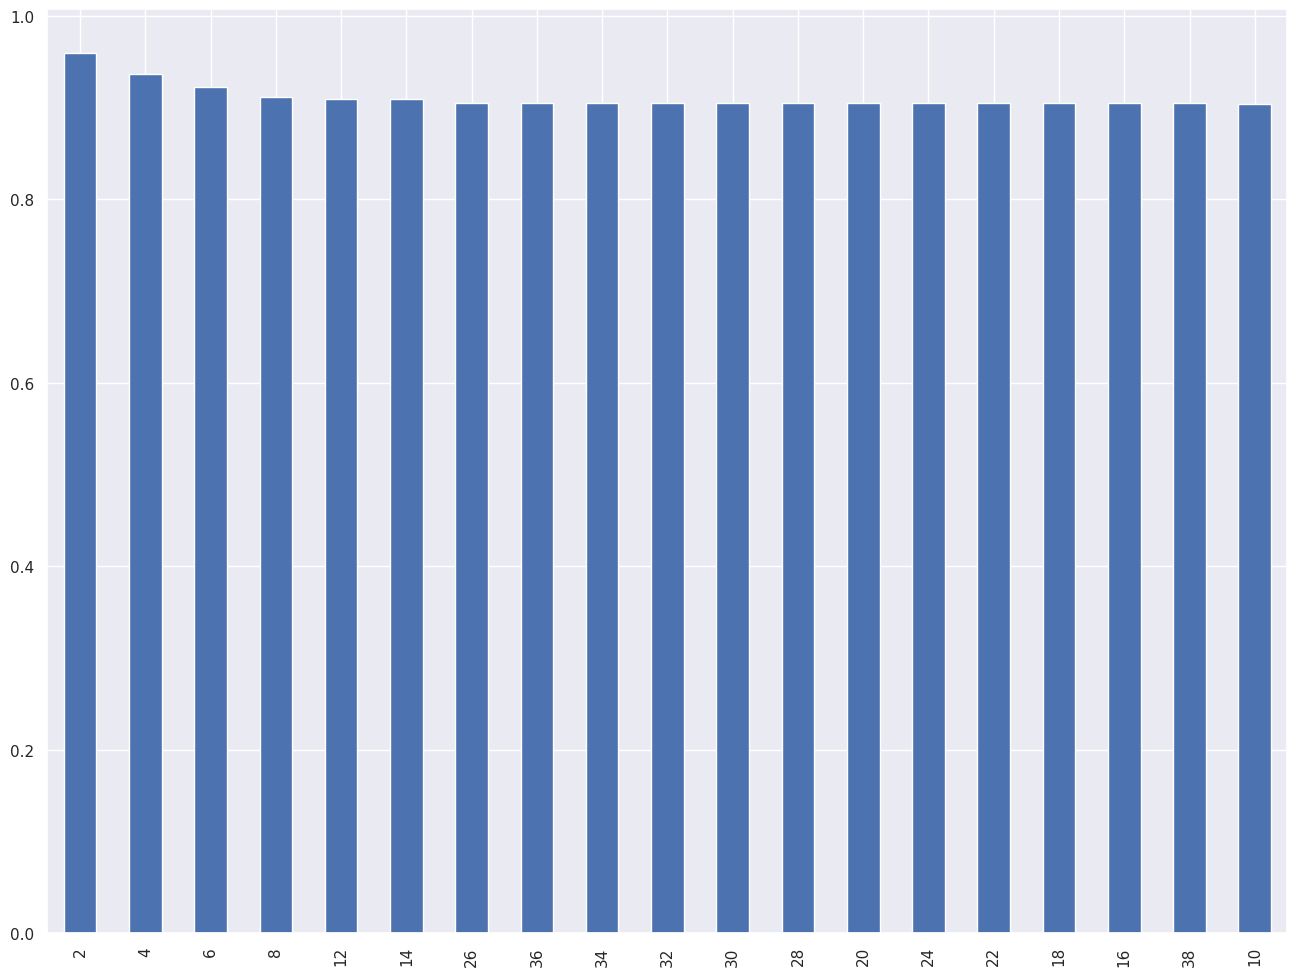

In [ ]:
res.sort_values("test", ascending=False).test.plot.bar()

<Axes: >

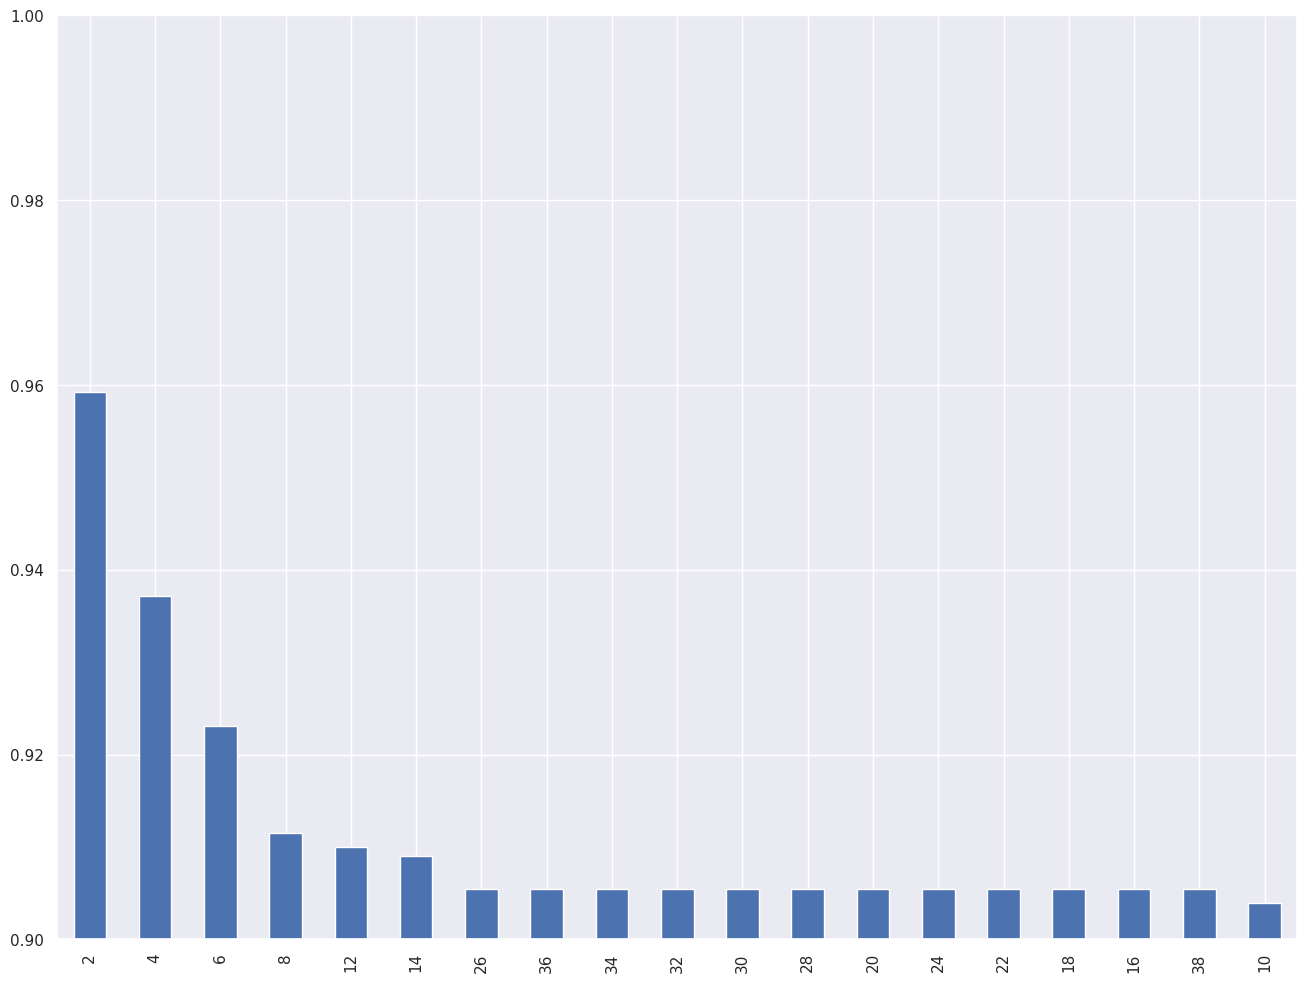

In [ ]:
res.sort_values("test", ascending=False).test.plot.bar(ylim=(0.9, 1))

<Axes: >

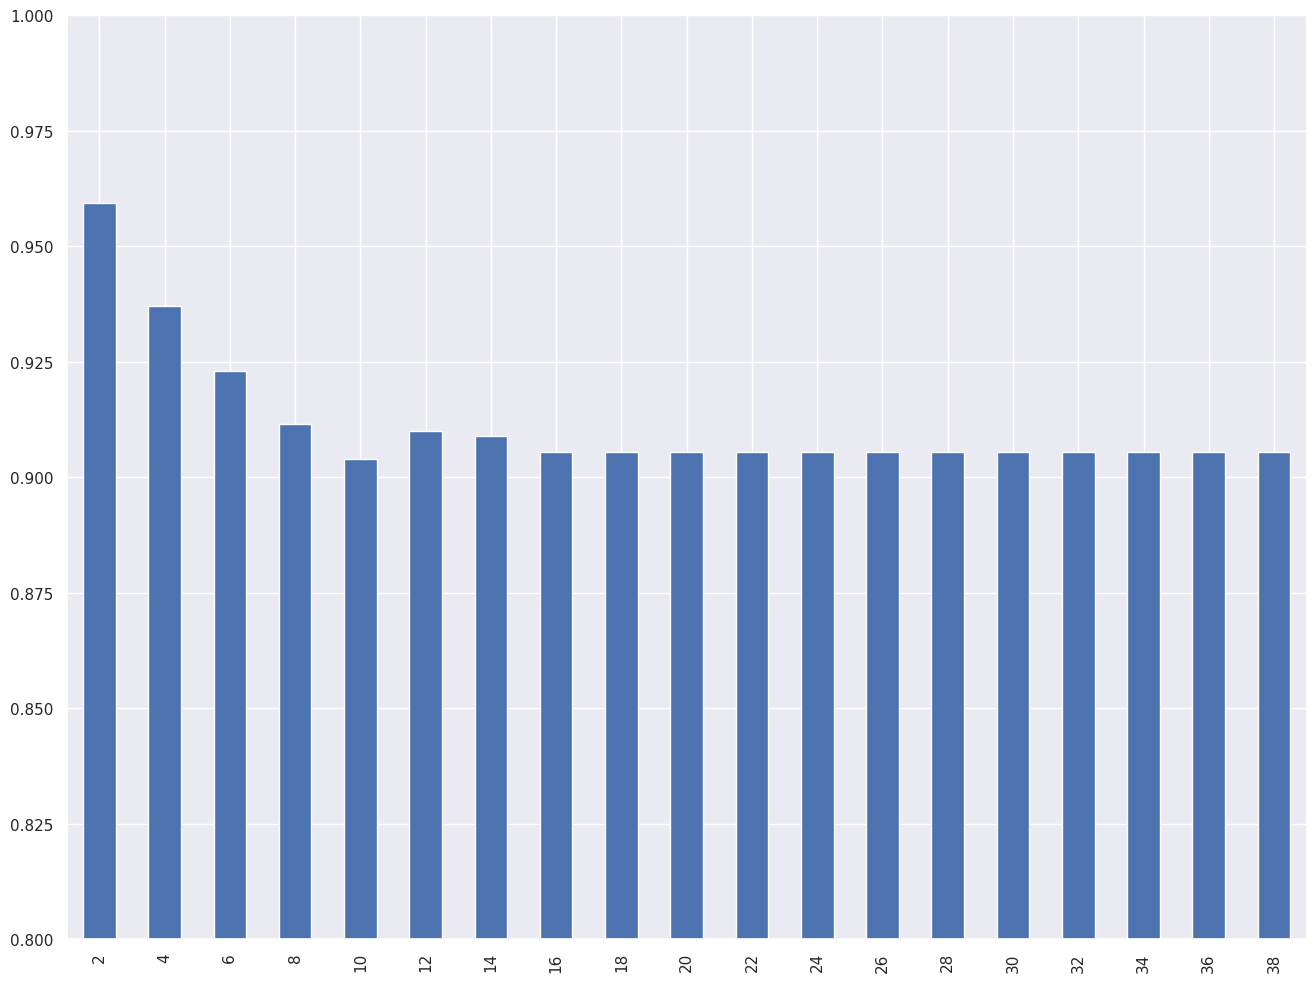

In [ ]:
res.test.plot.bar(ylim=(0.8, 1))

# Ejercitación



1.   Tomar los Datos Procesados de Titanic de la clase pasada
2.   Hacer una separación 80/20 en Train y Test
3.   Para la parte de Train, armar un esquema de CV con 5 Folds
4.   Entrenar un modelo de Random Forest, optimizando un parámetro al elección
5.   Evaluar cual es el máximo Area bajo la Curva ROC que se obtiene